# Анализ системы метрик приложения

Приложение Procrastinate Pro+, которое предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

Ваши задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

В вашем распоряжении есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `тут_была_ссылка` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `тут_была_ссылка` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `тут_была_ссылка` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных

Загрузите данные и получите основную информацию о них. Проведите необходимую предобработку. Основную информацию о данных и предобработке зафиксируйте в кратком промежуточном выводе.

###  Импорт необходимых библиотек,загрузка данных и знакомство с ними

- Импортируем необходимые библиотеки.

- Считаем и сохраним в датафреймы `df_visits`,`df_orders`,`df_costs` CSV-файлы `ppro_visits.csv`,`ppro_orders.csv`,`ppro_costs.csv`.

*Выведем на экран первые пять строк каждого датафрейма и информацию по ним .*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_visits = pd.read_csv('тут_была_ссылка')
df_orders = pd.read_csv('тут_была_ссылка')
df_costs = pd.read_csv('тут_была_ссылка')

In [3]:
display(df_visits.head())
display(df_visits.info())

,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB


None

In [4]:
display(df_orders.head())
display(df_orders.info())

,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB


None

In [5]:
display(df_costs.head())
display(df_costs.info())

,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB


None

### Поиск дублей и пропусков

*Проверим датафрейм df_visits*

In [6]:
df_null_visits = df_visits.isnull().sum().sum()
df_dp_visits =df_visits.duplicated().sum()
unic_id = df_visits['user_id'].nunique()

print(f'Полных дупликатов {df_dp_visits},пропусков {df_null_visits}, уникальных пользователей: {unic_id}')

Полных дупликатов 0,пропусков 0, уникальных пользователей: 74856


In [7]:
unique_id_1 = df_visits.duplicated(subset = ['user_id']).sum()

print(f'Количество неявных дубликатов {unique_id_1}')

Количество неявных дубликатов 87009


*Проверим датафрейм df_orders*

In [8]:
df_null_orders = df_orders.isnull().sum().sum()
df_dp_orderss =df_orders.duplicated().sum()
unic_id_orders = df_orders['user_id'].nunique()

print(f'Полных дупликатов {df_dp_orderss},пропусков {df_null_orders}, уникальных пользователей: {unic_id_orders}')

Полных дупликатов 0,пропусков 0, уникальных пользователей: 6889


In [9]:
unique_id_orders = df_orders.duplicated(subset = ['user_id']).sum()

print(f'Количество неявных дубликатов {unique_id_orders}')

Количество неявных дубликатов 27004


*Проверим датафрейм df_costs*

In [10]:
df_null_costs = df_costs.isnull().sum().sum()
df_dp_costs =df_costs.duplicated().sum()

print(f'Полных дупликатов {df_dp_orderss},пропусков {df_null_orders}')

Полных дупликатов 0,пропусков 0


***Видно что в данных много неявных дубликатов что яляется нормальным в контексте нашего проекта.Один и тот же пользователь может покупать и посещять приложение несколько раз.Это ценные данные поэтому проводить какие либо операции над дубликатами мы не станем,оставим их.***

In [11]:
df_visits['session_start'] = pd.to_datetime(df_visits['session_start'])
df_visits['session_end'] = pd.to_datetime(df_visits['session_end'])

df_orders['event_dt'] = pd.to_datetime(df_orders['event_dt'])

df_costs['dt'] = pd.to_datetime(df_costs['dt'])

***Преобразовали колонки с датами к типу datetime***

**Промежуточный вывод:**

- Данные загружены успешно, пропусков и полных дубликатов нет

- "Неявные дубликаты" являются нормальным поведением пользователей

- Преобразованы типы данных дат для дальнейшего анализа

## Подготовка данных к когортному анализу

Подготовьте данные к когортному анализу с учётом того, что вы будете изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя найдите:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Результаты сохраните в новой таблице, например, `profiles`.

Добавьте к данным с событиями и покупками информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы. После этого рассчитайте дневной лайфтайм для каждого события или покупки и добавьте в таблицу в виде целого числа. В дальнейшем при проведении когортного анализа используйте информацию о первом источнике привлечения пользователя.

In [12]:
profiles = df_visits.groupby('user_id').agg(
    first_dt = ('session_start','min'),
    first_channel = ('channel', 'first')
).reset_index()

print(profiles.head())

    user_id            first_dt   first_channel
0  26034876 2024-05-29 10:24:00        FaceBoom
1  69890364 2024-06-28 05:48:00  RocketSuperAds
2  75610104 2024-06-09 06:48:00        FaceBoom
3  76692397 2024-10-21 01:51:00        FaceBoom
4  80224421 2024-06-21 11:47:00        FaceBoom


*Создали таблицу profiles для когортного анализа*

In [13]:
profiles['first_dt_date'] = profiles['first_dt'].dt.date

users_count = profiles.groupby(['first_dt_date', 'first_channel']).agg(
    users_count=('user_id', 'count')
).reset_index()

print(users_count.head())

  first_dt_date   first_channel  users_count
0    2024-04-01        FaceBoom          133
1    2024-04-01    MediaTornado           80
2    2024-04-01  RocketSuperAds           70
3    2024-04-01          TipTop           73
4    2024-04-02        FaceBoom           94


*Посчитали, сколько пользователей пришло через каждый канал в каждый день*

In [14]:
daily_costs = df_costs.groupby(['channel', 'dt'])['costs'].sum().reset_index()

print(daily_costs.head())

    channel         dt       costs
0  FaceBoom 2024-04-01  124.938874
1  FaceBoom 2024-04-02   88.147779
2  FaceBoom 2024-04-03  120.779457
3  FaceBoom 2024-04-04   98.981253
4  FaceBoom 2024-04-05  109.044760


*Посчитали сумму затрат по каналам для каждого дня*

In [15]:
users_count['first_dt_date'] = pd.to_datetime(users_count['first_dt_date'])

cac_chanel_date = pd.merge(daily_costs,
                           users_count,
                           left_on=['dt', 'channel'],
                           right_on=['first_dt_date', 'first_channel'],
                           how='inner')

cac_chanel_date['CAC'] = cac_chanel_date['costs'] / cac_chanel_date['users_count']

In [16]:
profiles['first_dt_date'] = pd.to_datetime(profiles['first_dt_date'])

profiles_cac = pd.merge(profiles,
                        cac_chanel_date[['first_dt_date','first_channel','CAC']],
                        how='left',
                        on= ['first_dt_date','first_channel']
)

profiles_cac_1 = profiles_cac.drop('first_dt_date', axis=1)

In [17]:
orders_profiles = pd.merge(df_orders,
                           profiles_cac_1[['user_id', 'first_dt', 'first_channel', 'CAC']],
                           on = 'user_id',
                           how = 'left'
)

print(orders_profiles.head())

        user_id            event_dt  revenue            first_dt  \
0  771951256319 2024-04-01 05:56:26     2.99 2024-04-01 05:56:00   
1  829942381059 2024-04-01 14:55:02     2.99 2024-04-01 14:54:00   
2  727879856738 2024-04-01 22:15:09    14.99 2024-04-01 22:14:00   
3  481270888930 2024-04-01 06:05:14     2.99 2024-04-01 06:05:00   
4  844695029762 2024-04-01 01:19:52     2.99 2024-04-01 01:19:00   

  first_channel       CAC  
0      FaceBoom  0.939390  
1      FaceBoom  0.939390  
2      FaceBoom  0.939390  
3        TipTop  0.742467  
4      FaceBoom  0.939390  


*Обьеденили необходимые таблицы,расчитали CAC и Лайфтайм. Так же удалил лишний столбец 'first_dt_date' в датафрейме 'profiles_cac' т.к. это избыточный столбец.*

In [18]:
orders_profiles['lifetime'] = (orders_profiles['event_dt'].dt.date - orders_profiles['first_dt'].dt.date).dt.days

display(orders_profiles.head())
print(f"\nМинимальный лайфтайм: {orders_profiles['lifetime'].min():.0f} дней")
print(f"Среднее значение лайфтайма: {orders_profiles['lifetime'].mean():.0f} дня")
print(f"Максимальный лайфтайм: {orders_profiles['lifetime'].max():.0f} дня")

orders_first_28_days = orders_profiles[orders_profiles['lifetime'] <= 28]

print(f"Всего покупок: {len(orders_profiles)}")
print(f"Покупок за первые 28 дней: {len(orders_first_28_days)}")
print(f"Процент покупок в первые 28 дней: {len(orders_first_28_days)/len(orders_profiles)*100:.1f}%")

,user_id,event_dt,revenue,first_dt,first_channel,CAC,lifetime
0,771951256319,2024-04-01 05:56:26,2.99,2024-04-01 05:56:00,FaceBoom,0.939390,0
1,829942381059,2024-04-01 14:55:02,2.99,2024-04-01 14:54:00,FaceBoom,0.939390,0
2,727879856738,2024-04-01 22:15:09,14.99,2024-04-01 22:14:00,FaceBoom,0.939390,0
3,481270888930,2024-04-01 06:05:14,2.99,2024-04-01 06:05:00,TipTop,0.742467,0
4,844695029762,2024-04-01 01:19:52,2.99,2024-04-01 01:19:00,FaceBoom,0.939390,0



Минимальный лайфтайм: 0 дней
Среднее значение лайфтайма: 33 дня
Максимальный лайфтайм: 242 дня
Всего покупок: 33893
Покупок за первые 28 дней: 21664
Процент покупок в первые 28 дней: 63.9%


**Промежуточный вывод**

- Создана таблица profiles с информацией о привлечении пользователей

- Рассчитана стоимость привлечения (CAC) для каждого пользователя

- Данные о покупках объединены с информацией о привлечении

- Рассчитан лайфтайм для каждой покупки

По данным видно что процент покупок в первые 28 дней 64% что в целом является хорошим показателем.В среднем люди делают покупки в течении 33 дней.

## Анализ месячной динамики основных метрик продукта

**Задача 1**. Начните анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитайте по всем данным значения DAU, MAU и Stickiness и визуализируйте их. Активными считайте всех пользователей, которые взаимодействовали с приложением.

**Задача 2**. В разрезе каждого месяца привлечения новых пользователей рассчитайте:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитывайте всех привлечённых пользователей когорты.

Визуализируйте метрики и сформулируйте небольшой промежуточный вывод. Сделайте акцент на общей динамике изменения метрик с учётом появления нового контента в начале лета.

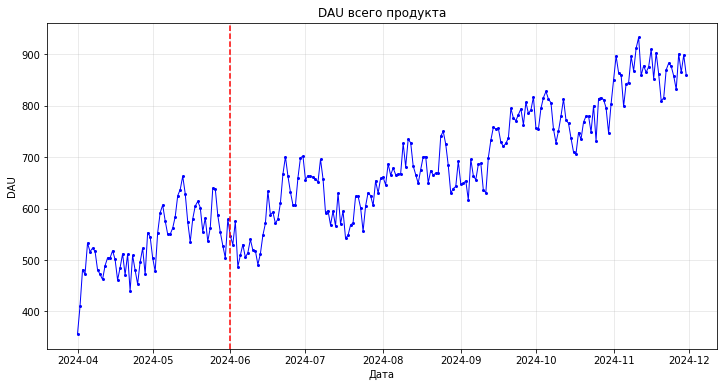

In [19]:
dau_total = df_visits.groupby(df_visits['session_start'].dt.date)['user_id'].nunique()

plt.figure(figsize=(12, 6))
dau_total.plot(kind='line', color='blue', marker='o', linewidth=1, markersize=2)
plt.ylabel('DAU')
plt.xlabel('Дата')
plt.title('DAU всего продукта')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--')
plt.grid(alpha=0.3)
plt.show()

*DAU продукта подтверждает что интерес пользователей к продукту вырос*

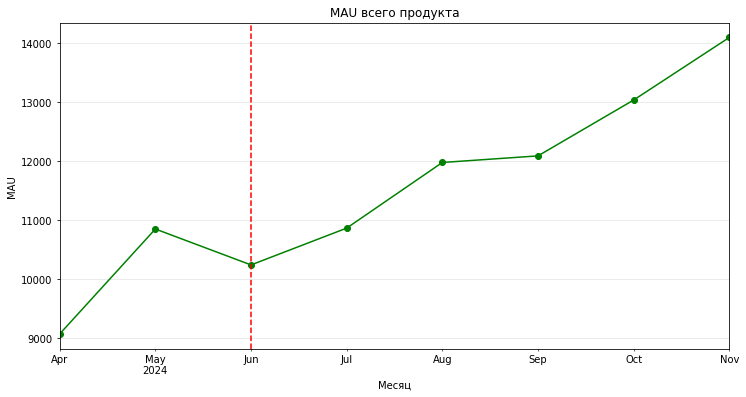

In [20]:
df_visits['month'] = df_visits['session_start'].dt.to_period('M').dt.to_timestamp()
mau_total = df_visits.groupby('month')['user_id'].nunique()

plt.figure(figsize=(12, 6))
mau_total.plot(kind='line', color='green', marker='o')
plt.ylabel('MAU')
plt.xlabel('Месяц')
plt.title('MAU всего продукта')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--')
plt.grid(alpha=0.3)
plt.show()

*MAU показывает ту же закономерность,количество активных пользователей выросло после внедрения нового контента*

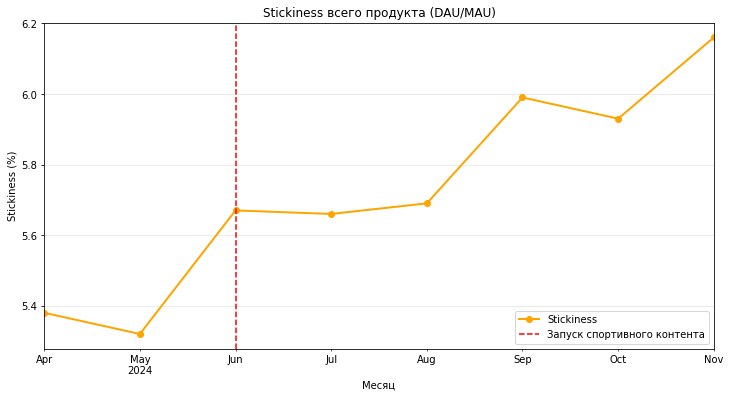

In [21]:
dau_df = dau_total.reset_index()
dau_df.columns = ['date', 'dau']

dau_df['month'] = pd.to_datetime(dau_df['date']).dt.to_period('M').dt.to_timestamp()

dau_monthly_avg = dau_df.groupby('month')['dau'].mean()

stickiness_total = (dau_monthly_avg / mau_total * 100).round(2)

plt.figure(figsize=(12, 6))
stickiness_total.plot(kind='line', 
                      title='Stickiness всего продукта (DAU/MAU)',
                      color='orange',
                      marker='o',
                      label = 'Stickiness',
                      linewidth=2)

plt.ylabel('Stickiness (%)')
plt.xlabel('Месяц')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', label='Запуск спортивного контента')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

*Здесь такаяже аналогичная ситуация,при этом вполне логичная.Интерес пользователей вырос,выросло число активных пользователей,а вместе с этим и увеличилось время проводимое пользователями в приложении*

***Задание 2***

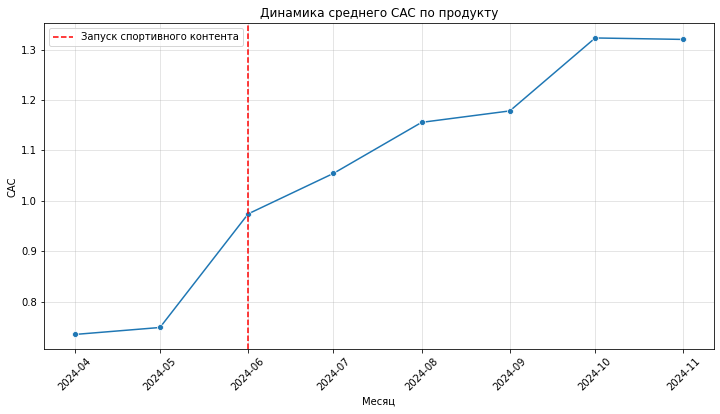

In [22]:
profiles_cac_1['month'] = profiles_cac_1['first_dt'].dt.to_period('M').dt.to_timestamp()

cac_monthly = profiles_cac_1.groupby('month').agg(
    total_users=('user_id', 'nunique'),
    avg_cac=('CAC', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cac_monthly,
    x='month',
    y='avg_cac',
    marker='o'
)

plt.title('Динамика среднего CAC по продукту')
plt.xlabel('Месяц')
plt.ylabel('CAC')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', label='Запуск спортивного контента')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

*Рассчитали и визуализировали среднюю стоимость привлечения пользователя (CAC).*

*Затраты на привлечение растут по тренду на протежении всего временного отрезка до октября,особенно заметен резкий рост с мая по июнь,а так же с сентября по октябрь.После октября тренд стабилизируется и переходит в режим стагнатации*

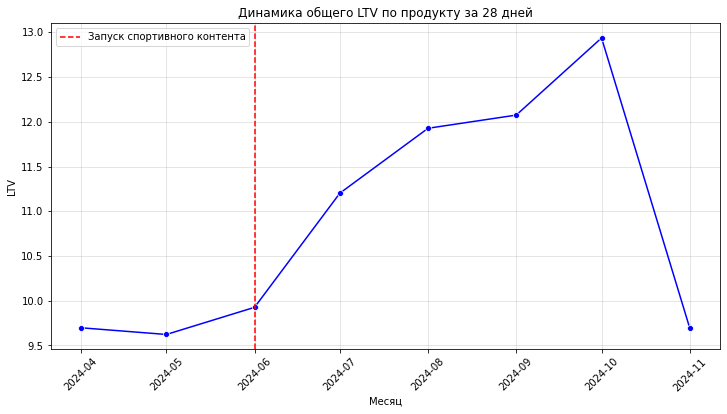

In [23]:
orders_first_28_days_with_month = pd.merge(
    orders_first_28_days,
    profiles_cac_1[['user_id', 'month']],
    on='user_id',
    how='left'
)

ltv_monthly = orders_first_28_days_with_month.groupby('month').agg(
    total_revenue=('revenue', 'sum'),
    users_count=('user_id', 'nunique')
).reset_index()

ltv_monthly['LTV'] = ltv_monthly['total_revenue'] / ltv_monthly['users_count']

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=ltv_monthly,
    x='month',
    y='LTV',
    marker='o',
    color='blue'
)

plt.title('Динамика общего LTV по продукту за 28 дней')
plt.xlabel('Месяц')
plt.ylabel('LTV')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', label='Запуск спортивного контента')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

*Рост LTV тоже заметен с мая,а после выхода нового контента динамика тренда резко пошла вверх до июля месяца.В целом продукт показывает стабильный рост до октября месяца.После видно резкое падение метрики.Стоит уточнить у маркетологов и програмистов что происходило в продукте в этот периуд.*

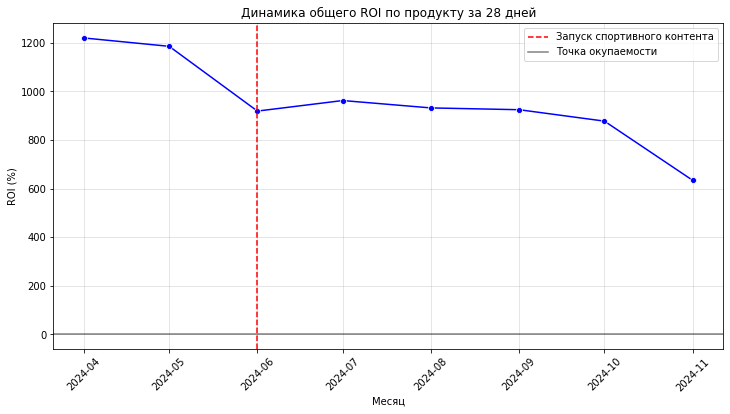

In [24]:
roi_monthly = pd.merge(ltv_monthly, cac_monthly, on='month')
roi_monthly['ROI'] = (roi_monthly['LTV'] - roi_monthly['avg_cac']) / roi_monthly['avg_cac'] * 100

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=roi_monthly,
    x='month',
    y='ROI',
    marker='o',
    color='blue'
)

plt.title('Динамика общего ROI по продукту за 28 дней')
plt.xlabel('Месяц')
plt.ylabel('ROI (%)')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', label='Запуск спортивного контента')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, label='Точка окупаемости')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

*Динамика ROI до июньского обновления показывала отрицательную тенденцию.Возможно выход нового контента смог помочь продукту стабилизировать тренд но с октября месяца с падением метрики LTV при стагнатации метрики CAC - метрика ROI закономерно снова пошла на спад.
Стоит срочно узнать что стало катализатором такого поведения метрик*

**Промежуточные выводы**

**Отметим успех в количестве привлечённых пользователей,у нас увеличилось число активных пользователей,а так же мы смогли улучшить пользовательский опыт.Клиенты стали проводить больше времени в продукте.**

**Что качаемо затрат и прибыли тут мы видим сто у нас вырасла стоимость привлечения клиентов,а так же ухудшились показатели LTV и ROI.Основное падение выпадает на сентябрь и октябрь месяц.Стоит глубже проанализировать продукт в это время,возможно были какие то акции,проверить сколько мы платим тратим денег на маркетинг.Так же не исключено что мы стали приводить в продукт больше менее платёжеспособных или пользователей с меньшим желанием платить за подписки,при этом потратив на их привлечение знначительную сумму денег.**

**Продолжим анализ и возможно найдём новые закономерности**

## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

**Задача 1**. Определите самые популярные источники привлечения:
- Посчитайте общее число привлечённых пользователей для каждого источника.
- Визуализируйте динамику набора новых пользователей по дням в каждом источнике.
- Рассчитайте и визуализируйте динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучите динамику изменения метрик на 28-й день в разрезе источника. Проведите анализ с выделением недельных когорт по дате привлечения. Рассчитайте и визуализируйте:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.

Недельную динамику затрат на маркетинг по каждому источнику привлечения.
Динамику среднего CAC, значений LTV и ROI.

По результатам проведите анализ рекламных каналов. Дайте общую характеристику каждому рекламному каналу по рассчитанным метрикам. Укажите, какие рекламные каналы не вышли на уровень окупаемости за ожидаемый период, и предположите почему.


In [25]:
popular_channels = profiles_cac_1.groupby('first_channel')['user_id'].count().reset_index()
popular_channels.columns = ['channel', 'total_users']
popular_channels = popular_channels.sort_values('total_users', ascending=False)

total_users = popular_channels['total_users'].sum()
popular_channels['share_percent'] = (popular_channels['total_users'] / total_users * 100).round(1)
print('Доля каждого источника:')
display(popular_channels.head())

Доля каждого источника:


,channel,total_users,share_percent
0,FaceBoom,28401,37.9
3,TipTop,18118,24.2
2,RocketSuperAds,14257,19.0
1,MediaTornado,14080,18.8


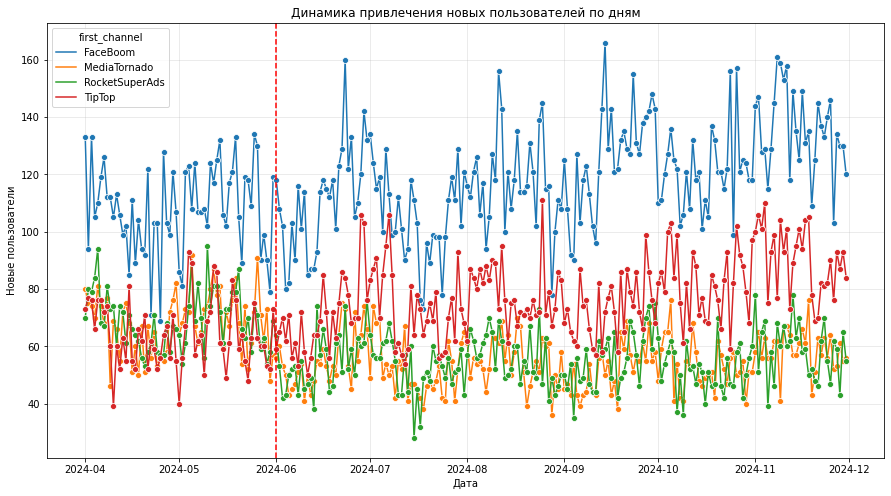

In [26]:
days_channels = profiles_cac_1.groupby([profiles_cac_1['first_dt'].dt.date, 'first_channel'])['user_id'].count().reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(data = days_channels,
             x = 'first_dt',
             y = 'user_id',
             hue = 'first_channel',
             marker = 'o'
)

plt.title('Динамика привлечения новых пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Новые пользователи')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--')
plt.grid(alpha=0.3)
plt.show()

*Динамика привлечения новых пользователей положительная у каналов 'FaceBoom' и 'TipTop', у остольных каналов присутсвует неболльшой спад в среднем по тренду*

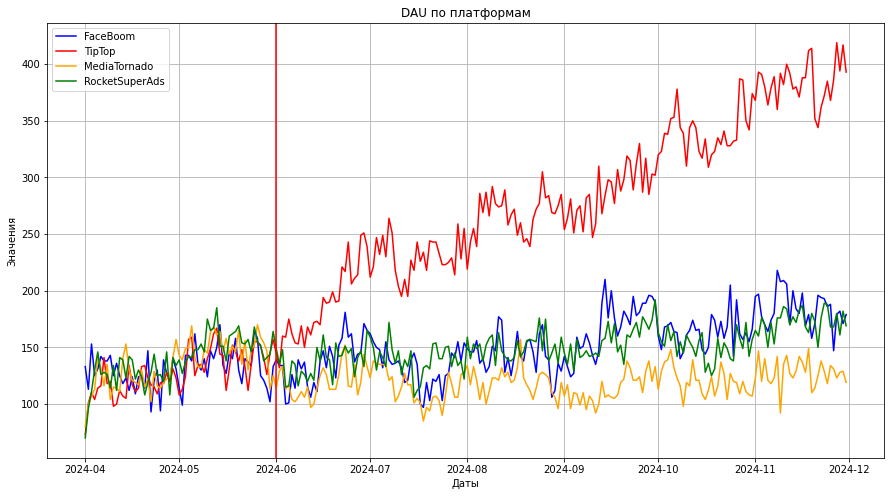

In [27]:
dau = df_visits.groupby([df_visits['session_start'].dt.date, 'channel'])['user_id'].nunique().reset_index()

dau['date'] = pd.to_datetime(dau['session_start'])
dau['month'] = dau['date'].dt.to_period('M').dt.to_timestamp()

plt.subplots(figsize=(15,8))
plt.plot(dau[dau['channel'] == 'FaceBoom']['session_start'], dau[dau['channel'] == 'FaceBoom']['user_id'], color = 'blue')
plt.plot(dau[dau['channel'] == 'TipTop']['session_start'], dau[dau['channel'] == 'TipTop']['user_id'], color = 'red')
plt.plot(dau[dau['channel'] == 'MediaTornado']['session_start'], dau[dau['channel'] == 'MediaTornado']['user_id'], color = 'orange')
plt.plot(dau[dau['channel'] == 'RocketSuperAds']['session_start'], dau[dau['channel'] == 'RocketSuperAds']['user_id'], color = 'green')
plt.title('DAU по платформам')
plt.legend(['FaceBoom','TipTop', 'MediaTornado', 'RocketSuperAds'])
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.axvline(x = pd.Timestamp('2024-06-01'), color='red')
plt.grid()
plt.show()

*По графику DAU видно что с момента внедрения спортивного контента количество активных пользователей с канала 'TipTop' значительно выросла.Возможно на этом канале большое количество заинтересованных пользователей?*

*Так же заметен небольшой рост у канала 'FaceBoom', у остальных каналов изменений не заметно*

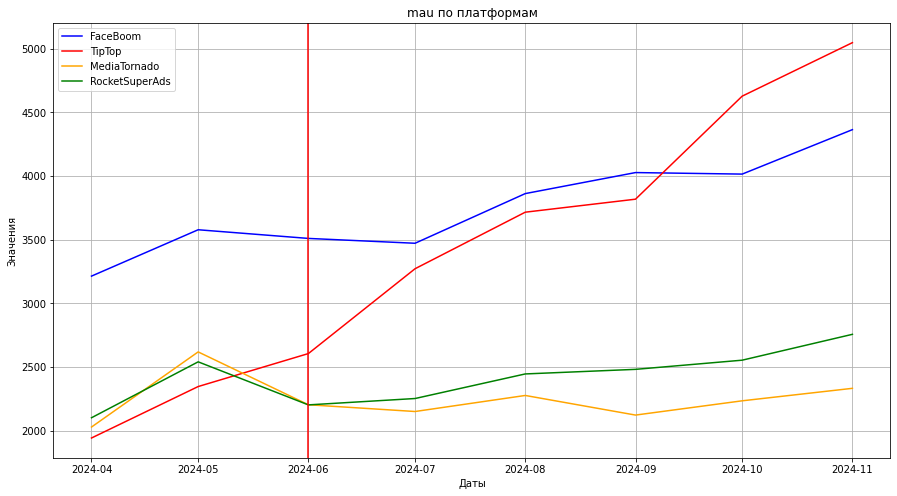

In [28]:
df_visits['month'] = df_visits['session_start'].dt.to_period('M').dt.to_timestamp()

mau = df_visits.groupby(['month', 'channel'])['user_id'].nunique().reset_index()

plt.subplots(figsize=(15,8))
plt.plot(mau[mau['channel'] == 'FaceBoom']['month'], mau[mau['channel'] == 'FaceBoom']['user_id'], color = 'blue')
plt.plot(mau[mau['channel'] == 'TipTop']['month'], mau[mau['channel'] == 'TipTop']['user_id'], color = 'red')
plt.plot(mau[mau['channel'] == 'MediaTornado']['month'], mau[mau['channel'] == 'MediaTornado']['user_id'], color = 'orange')
plt.plot(mau[mau['channel'] == 'RocketSuperAds']['month'], mau[mau['channel'] == 'RocketSuperAds']['user_id'], color = 'green')
plt.title('mau по платформам')
plt.legend(['FaceBoom','TipTop', 'MediaTornado', 'RocketSuperAds'])
plt.xlabel('Даты')
plt.ylabel('Значения')
plt.axvline(x = pd.Timestamp('2024-06-01'), color='red')
plt.grid()
plt.show()

*По графику MAU в целом наблюдается общий рост пользовательской базы с апреля 2024 года. Канал TipTop демонстрирует наиболее выраженную положительную динамику, причем рост начался еще до внедрения спортивного контента. FaceBoom показывает умеренный рост, в то время как MediaTornado и RocketSuperAds остаются относительно стабильными. Запуск нового контента в июне, возможно, поддержал существующие тренды, но не стал катализатором резкого изменения динамики.*

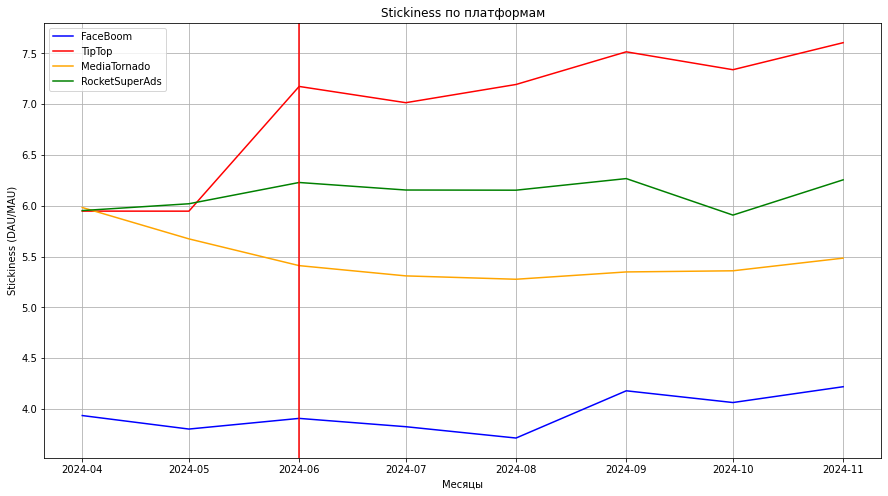

In [29]:
dau_monthly_average = dau.groupby(['month', 'channel'])['user_id'].mean().reset_index()

stickiness_table = pd.merge(mau, dau_monthly_average, how='left', on=['month', 'channel'])
stickiness_table['stick'] = 100*(stickiness_table['user_id_y'] / stickiness_table['user_id_x'])

plt.subplots(figsize=(15,8))
plt.plot(stickiness_table[stickiness_table['channel'] == 'FaceBoom']['month'], 
         stickiness_table[stickiness_table['channel'] == 'FaceBoom']['stick'], 
         color='blue', label='FaceBoom')
plt.plot(stickiness_table[stickiness_table['channel'] == 'TipTop']['month'], 
         stickiness_table[stickiness_table['channel'] == 'TipTop']['stick'], 
         color='red', label='TipTop')
plt.plot(stickiness_table[stickiness_table['channel'] == 'MediaTornado']['month'], 
         stickiness_table[stickiness_table['channel'] == 'MediaTornado']['stick'], 
         color='orange', label='MediaTornado')
plt.plot(stickiness_table[stickiness_table['channel'] == 'RocketSuperAds']['month'], 
         stickiness_table[stickiness_table['channel'] == 'RocketSuperAds']['stick'], 
         color='green', label='RocketSuperAds')

plt.title('Stickiness по платформам')
plt.legend() 
plt.xlabel('Месяцы')
plt.ylabel('Stickiness (DAU/MAU)')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red')
plt.grid()
plt.show()

*Далее расчитали метрику 'Залипательности'.По графику видно что внедрение нового контента могло положительно повлять на время залипания пользователей в приложении у каналов 'TipTop' и 'FaceBoom', а также предотвратить падение тренда по каналу 'MediaTornado'.По каналу 'MediaTornado' с августа есть положительная динамика но рост мог быть вызван как новым контентом, так и другими факторами - Требуется более глубокий анализ в этот месяц. Канал 'RocketSuperAds' по данной метрике показывает стагнатацию.*

**Задание 2**

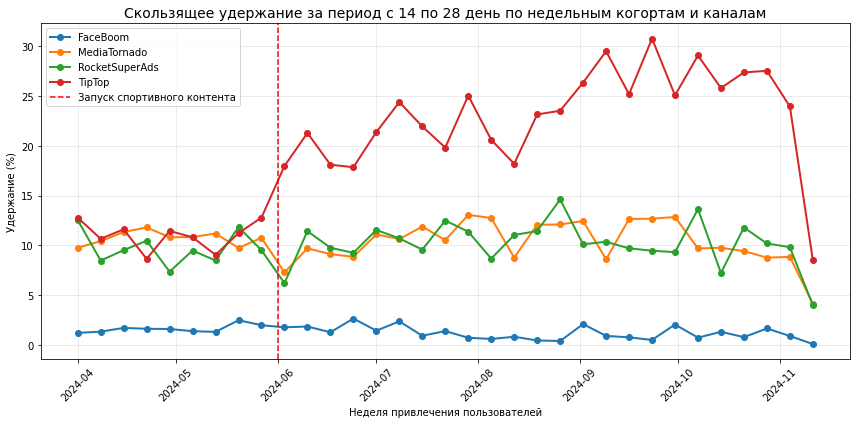

In [30]:
visits_with_profiles = pd.merge(
    df_visits[['user_id', 'session_start']],
    profiles_cac_1[['user_id', 'first_dt', 'first_channel']],
    on='user_id',
    how='left'
)

visits_with_profiles['lifetime'] = (
    visits_with_profiles['session_start'].dt.date - visits_with_profiles['first_dt'].dt.date
).dt.days

visits_with_profiles['cohort_week'] = visits_with_profiles['first_dt'].dt.to_period('W').dt.to_timestamp()

def calculate_rolling_retention_14_28(df):
    cohorts = df.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index(name='total_users')
    
    active_in_period = df[
        (df['lifetime'] >= 14) & 
        (df['lifetime'] <= 28)
    ]
    
    returned = active_in_period.groupby(['cohort_week', 'first_channel'])['user_id'].nunique().reset_index(name='returned_users')
    
    retention = pd.merge(
        cohorts,
        returned,
        on=['cohort_week', 'first_channel'],
        how='left'
    )
    
    retention['rolling_retention'] = (retention['returned_users'] / retention['total_users'] * 100).round(2)
    
    return retention

rolling_retention_14_28 = calculate_rolling_retention_14_28(visits_with_profiles)

plt.figure(figsize=(12, 6))

for channel in rolling_retention_14_28['first_channel'].unique():
    channel_data = rolling_retention_14_28[rolling_retention_14_28['first_channel'] == channel]
    plt.plot(channel_data['cohort_week'], channel_data['rolling_retention'], marker='o', label=channel, linewidth=2)

plt.title('Скользящее удержание за период с 14 по 28 день по недельным когортам и каналам', fontsize=14)
plt.xlabel('Неделя привлечения пользователей')
plt.ylabel('Удержание (%)')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', label='Запуск спортивного контента')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Удержание пользователей после выхода нового контента не повлияло на удержание пользователей в целом.Можно было бы предположить что выход нового контента мог положительно повлиять на динамику роста в канале 'TipTop',но рост начался чуть раньше.Стоит продолжить анализ метрик.*

*В ноябре что то произошло в продукте,тренды по 3 каналам стали стремительно падать вниз,возможно произошёл сбой в продукте или перестали записываться данные.Стоит уточнить что происходит в продукте в этот период*

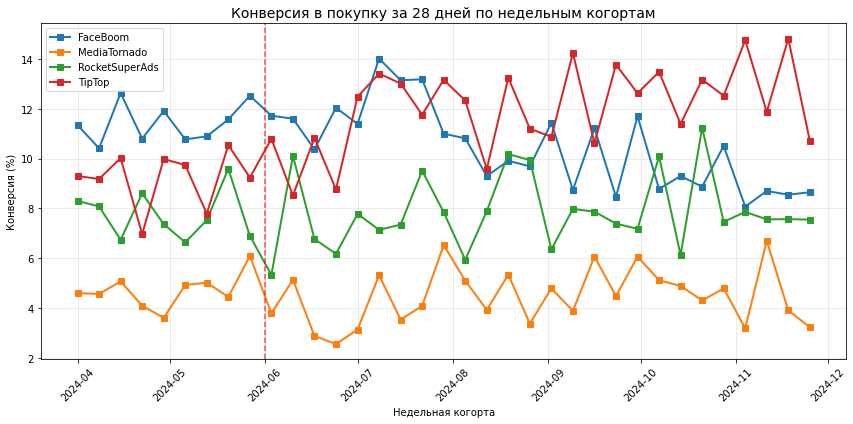

In [31]:
profiles_cac_1['cohort_week'] = profiles_cac_1['first_dt'].dt.to_period('W').dt.to_timestamp()

orders_with_cohorts = pd.merge(
    orders_first_28_days,
    profiles_cac_1[['user_id', 'cohort_week', 'first_channel']],
    on='user_id',
    how='left'
)


conversion_by_cohort = orders_with_cohorts.groupby(['cohort_week', 'first_channel_y'])['user_id'].nunique().reset_index()
conversion_by_cohort.columns = ['cohort_week', 'channel', 'payers_count']

cohort_sizes = profiles_cac_1.groupby(['cohort_week', 'first_channel'])['user_id'].count().reset_index()
cohort_sizes.columns = ['cohort_week', 'channel', 'cohort_size']

conversion_analysis = pd.merge(conversion_by_cohort, cohort_sizes, on=['cohort_week', 'channel'])
conversion_analysis['conversion_rate'] = (conversion_analysis['payers_count'] / conversion_analysis['cohort_size'] * 100).round(2)

plt.figure(figsize=(12, 6))
for channel in conversion_analysis['channel'].unique():
    channel_data = conversion_analysis[conversion_analysis['channel'] == channel]
    plt.plot(channel_data['cohort_week'], channel_data['conversion_rate'], 
             marker='s', label=channel, linewidth=2)

plt.title('Конверсия в покупку за 28 дней по недельным когортам', fontsize=14)
plt.xlabel('Недельная когорта')
plt.ylabel('Конверсия (%)')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Визуально сложно сказать что на рост или падение метрик повлиял выход нового контента.Видно что у канала 'TipTop' тренд показывает положительную динамику,но рост начался и до выхода нового контента.Тренд канала 'FaceBoom' начал просидать в июле-августе месяце.У 'MediaTornado' тренд тоже показывает динамику падения к декабрю месяцу,а 'RocketSuperAds' в среднем остался без изменений по динамике.*

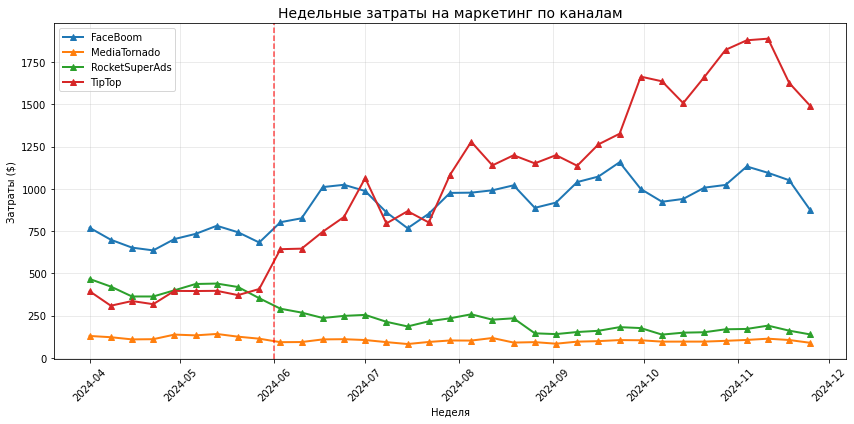

In [32]:
df_costs['week'] = df_costs['dt'].dt.to_period('W').dt.to_timestamp()
weekly_costs = df_costs.groupby(['week', 'channel'])['costs'].sum().reset_index()

plt.figure(figsize=(12, 6))
for channel in weekly_costs['channel'].unique():
    channel_data = weekly_costs[weekly_costs['channel'] == channel]
    plt.plot(channel_data['week'], channel_data['costs'], 
             marker='^', label=channel, linewidth=2)

plt.title('Недельные затраты на маркетинг по каналам', fontsize=14)
plt.xlabel('Неделя')
plt.ylabel('Затраты ($)')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Затраты каналов 'FaceBoom' и 'TipTop' заметно выросли с июня,к декабрю видно что тренды показывают динамику на спад,но анализируя предытущее поведение тренда нельзя сказать что тренд снова не начнёт расти.*

*Затраты 'RocketSuperAds' снизились и выравнился, 'MediaTornado' остался в целом без изменений,но хвост тоже показыват динамику на небольшойспад к декабрю месяцу*

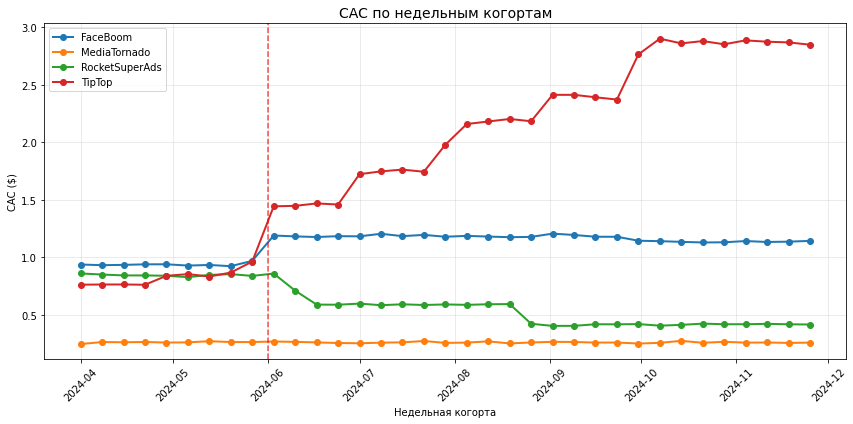

In [33]:
weekly_costs_agg = weekly_costs.groupby(['week', 'channel'])['costs'].sum().reset_index()
cac_by_cohort = pd.merge(cohort_sizes, weekly_costs_agg, 
                        left_on=['cohort_week', 'channel'], 
                        right_on=['week', 'channel'])
cac_by_cohort['CAC'] = cac_by_cohort['costs'] / cac_by_cohort['cohort_size']

plt.figure(figsize=(12, 6))
for channel in cac_by_cohort['channel'].unique():
    channel_data = cac_by_cohort[cac_by_cohort['channel'] == channel]
    plt.plot(channel_data['cohort_week'], channel_data['CAC'], 
             marker='o', label=channel, linewidth=2)

plt.title('CAC по недельным когортам', fontsize=14)
plt.xlabel('Недельная когорта')
plt.ylabel('CAC ($)')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*С июня месяца тренды мтерика CAC резко выросла для канала 'TipTop',так же затраты вырасли и на канале 'Face Boom' в то время как у канала 'RocketSuperAds' тренд снизился и перешёл в стагнатицию.У канала 'MediaTornado' тренд без изменений.*

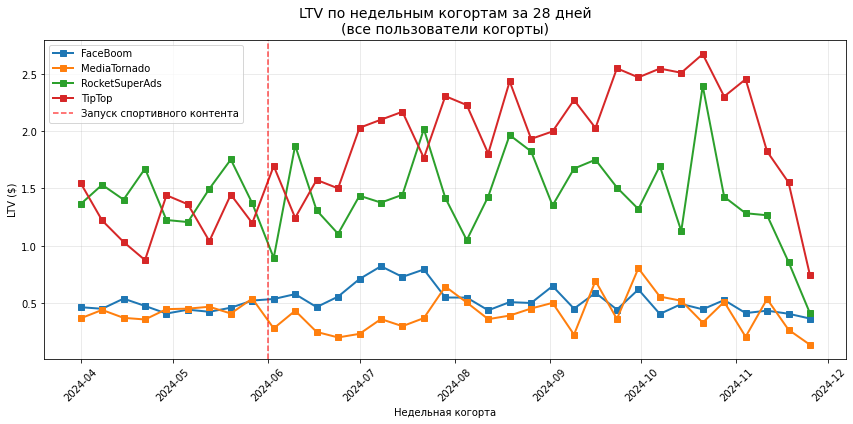

In [34]:
ltv_corrected = orders_with_cohorts.groupby(['cohort_week', 'first_channel_y']).agg({
    'revenue': 'sum'
}).reset_index()

cohort_users = profiles_cac_1.groupby(['cohort_week', 'first_channel'])['user_id'].count().reset_index()
cohort_users.columns = ['cohort_week', 'channel', 'total_users']

ltv_corrected = pd.merge(ltv_corrected, cohort_users, 
                        left_on=['cohort_week', 'first_channel_y'],
                        right_on=['cohort_week', 'channel'])

ltv_corrected['LTV'] = ltv_corrected['revenue'] / ltv_corrected['total_users']
ltv_corrected = ltv_corrected[['cohort_week', 'channel', 'LTV', 'total_users', 'revenue']]

plt.figure(figsize=(12, 6))
for channel in ltv_corrected['channel'].unique():
    channel_data = ltv_corrected[ltv_corrected['channel'] == channel]
    plt.plot(channel_data['cohort_week'], channel_data['LTV'], 
             marker='s', label=channel, linewidth=2)

plt.title('LTV по недельным когортам за 28 дней\n(все пользователи когорты)', fontsize=14)
plt.xlabel('Недельная когорта')
plt.ylabel('LTV ($)')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', alpha=0.7, label='Запуск спортивного контента')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Динамика LTV в целом по каналам либо положительная либо стабильная,но как и на других метриках,к декабрю мы видим заметный спад.Стоит уделить особое внимание этому периоду т.к. LTV для бизнеса является одним из основныз показателей для бизнеса финансового успеха продукта*

*Выход нового контента в целом мог положительно повлиять на тренды после июня месяца*

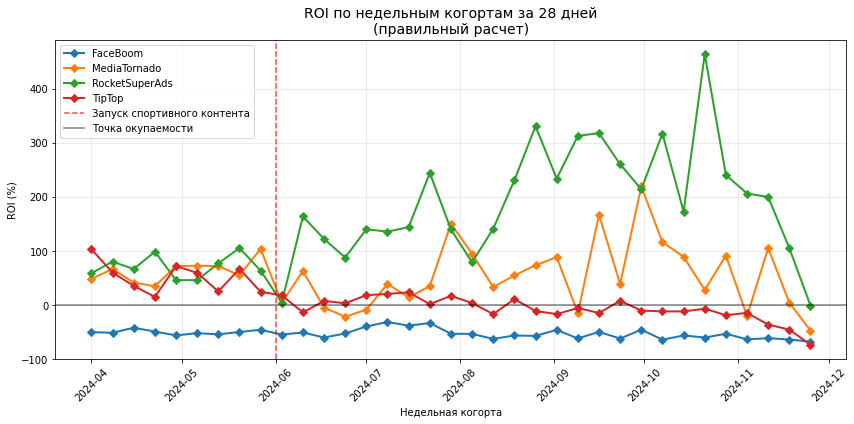

In [35]:
roi_corrected = pd.merge(ltv_corrected[['cohort_week', 'channel', 'LTV']], 
                        cac_by_cohort[['cohort_week', 'channel', 'CAC']], 
                        on=['cohort_week', 'channel'])

roi_corrected['ROI'] = ((roi_corrected['LTV'] - roi_corrected['CAC']) / roi_corrected['CAC'] * 100).round(2)


plt.figure(figsize=(12, 6))
for channel in roi_corrected['channel'].unique():
    channel_data = roi_corrected[roi_corrected['channel'] == channel]
    plt.plot(channel_data['cohort_week'], channel_data['ROI'], 
             marker='D', label=channel, linewidth=2)

plt.title('ROI по недельным когортам за 28 дней\n(правильный расчет)', fontsize=14)
plt.xlabel('Недельная когорта')
plt.ylabel('ROI (%)')
plt.axvline(x=pd.Timestamp('2024-06-01'), color='red', linestyle='--', alpha=0.7, label='Запуск спортивного контента')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, label='Точка окупаемости')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Выход июньского контента мог повлиять на положительную динамику ROI для канала 'RocketSuperAds' что является хорошим показателем(не считая моемнта падения тренда ноября и декабря).TipTop и FaceBoom являются убыточными каналами которые не окупаются,а канал 'MediaTornado' находится на грани окупаемости,и к декабрю месяцу тренд стал падать ещё значительно ниже.*

*Так же как и на предыдущих мтеориках стоит уделить вниманию что происходило в продукте с ноября по декабрь месяц,т.к. тренды показывают сильный спад*

**Промежуточный вывод**

**Маркетинг стал вкладывать огромные бюджеты в канал TipTop, который является глубоко убыточным. Рост общих маркетинговых затрат (CAC) не компенсируется адекватным ростом выручки (LTV) от пользователей этого канала.**

**Вторичная причина: Пользователи TipTop демонстрируют низкие показатели вовлеченности (Stickiness), удержания и конверсии. Мы привлекаем "холодную" или нерелевантную аудиторию по высокой цене.**

**Так же заметен резкий спад к декабрю,что говорит о возможном техничкском сбое в продукте.**

**На данном этапе я бы предложил начать срочно выеснянять причину огромных маркетинговых затрт и на время раследования пререраспределить бюджет в пользу более прибыльных каналов.Так же проанализировать с чем связано падения трендов к декабрю месяцу.**

## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитайте и визуализируйте в виде тепловой карты значения ROI за больший период, например за 8–10 недель.

Разделите данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используйте недели.

Сделайте вывод о том, за какой период окупаются вложения в эти источники.

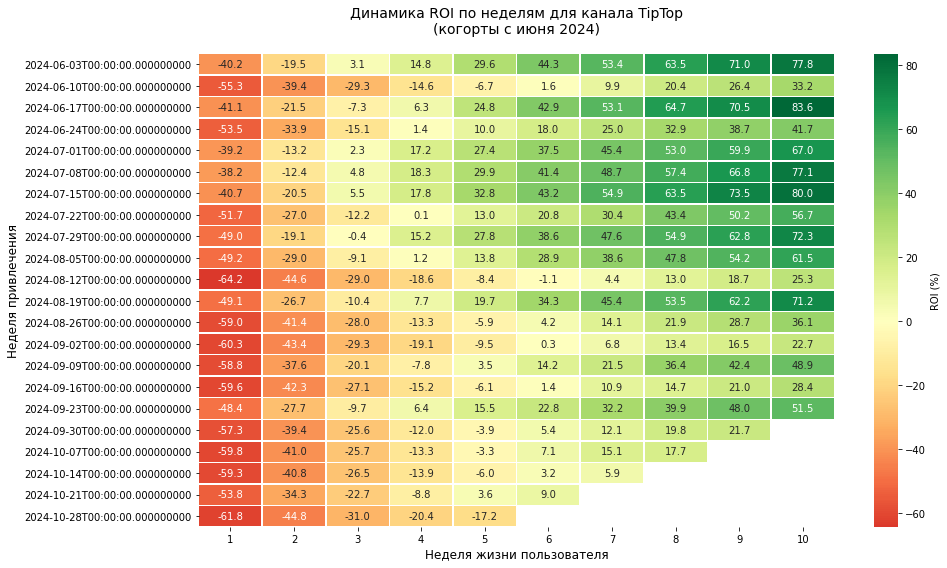

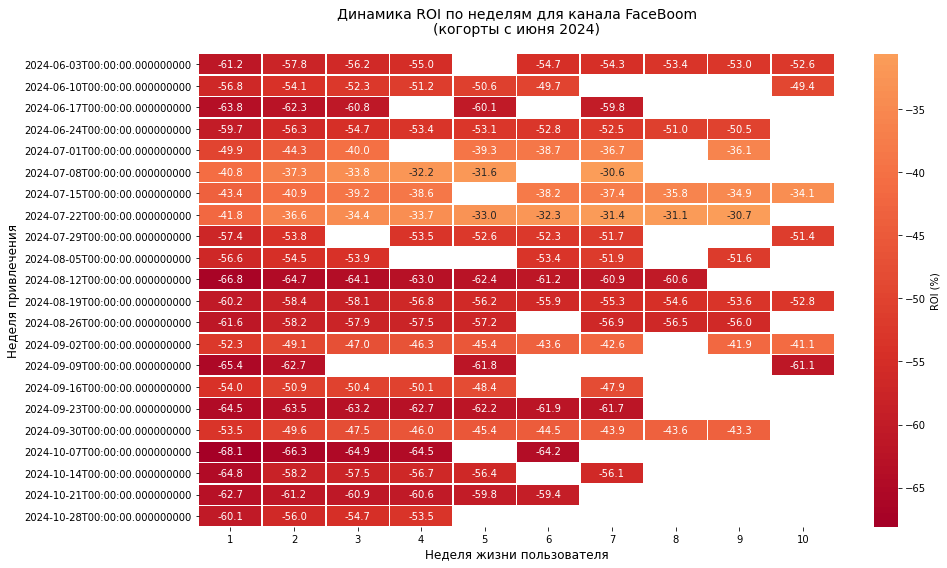

In [36]:
orders_extended_period = orders_profiles[orders_profiles['lifetime'] <= 70]

orders_extended_with_cohorts = pd.merge(
    orders_extended_period,
    profiles_cac_1[['user_id', 'cohort_week', 'first_channel']],
    on='user_id',
    how='left'
)

orders_extended_with_cohorts.rename(columns={'first_channel_y': 'channel'}, inplace=True)

orders_extended_with_cohorts['lifetime_week'] = (orders_extended_with_cohorts['lifetime'] // 7) + 1
orders_extended_with_cohorts['lifetime_week'] = orders_extended_with_cohorts['lifetime_week'].clip(upper=10)

weekly_revenue = orders_extended_with_cohorts.groupby(
    ['cohort_week', 'channel', 'lifetime_week']
)['revenue'].sum().reset_index()

weekly_revenue['cumulative_revenue'] = weekly_revenue.groupby(
    ['cohort_week', 'channel']
)['revenue'].cumsum()


cohort_sizes = profiles_cac_1.groupby(['cohort_week', 'first_channel'])['user_id'].count().reset_index()
cohort_sizes.columns = ['cohort_week', 'channel', 'cohort_size']


weekly_costs_agg = df_costs.groupby(['week', 'channel'])['costs'].sum().reset_index()
cac_by_cohort = pd.merge(cohort_sizes, weekly_costs_agg, 
                        left_on=['cohort_week', 'channel'], 
                        right_on=['week', 'channel'])
cac_by_cohort['CAC'] = cac_by_cohort['costs'] / cac_by_cohort['cohort_size']


cohort_analysis_extended = pd.merge(
    weekly_revenue,
    cohort_sizes,
    on=['cohort_week', 'channel']
)

cohort_analysis_extended = pd.merge(
    cohort_analysis_extended,
    cac_by_cohort[['cohort_week', 'channel', 'CAC']],
    on=['cohort_week', 'channel']
)


cohort_analysis_extended['LTV'] = cohort_analysis_extended['cumulative_revenue'] / cohort_analysis_extended['cohort_size']
cohort_analysis_extended['ROI'] = ((cohort_analysis_extended['LTV'] - cohort_analysis_extended['CAC']) / 
                                  cohort_analysis_extended['CAC'] * 100).round(1)


unprofitable_channels = ['TipTop', 'FaceBoom']

for channel in unprofitable_channels:
    channel_data = cohort_analysis_extended[
        (cohort_analysis_extended['channel'] == channel) & 
        (cohort_analysis_extended['cohort_week'] >= '2024-06-01') &
        (cohort_analysis_extended['cohort_week'] <= '2024-10-31')  # Исключаем поздние когорты с неполными данными
    ]
    
    
    pivot_data = channel_data.pivot_table(
        index='cohort_week',
        columns='lifetime_week',
        values='ROI',
        aggfunc='mean'
    ).round(1)
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot_data, 
                annot=True, 
                fmt='.1f',
                cmap='RdYlGn',
                center=0,
                cbar_kws={'label': 'ROI (%)'},
                linewidths=0.5)
    
    plt.title(f'Динамика ROI по неделям для канала {channel}\n(когорты с июня 2024)', fontsize=14, pad=20)
    plt.xlabel('Неделя жизни пользователя', fontsize=12)
    plt.ylabel('Неделя привлечения', fontsize=12)
    plt.tight_layout()
    plt.show()

## Выводы и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты. Например, охарактеризуйте аудиторию продукта, покажите распределение маркетинговых затрат по каналам привлечения, опишите каждый канал привлечения. Делайте акцент на сильных и слабых сторонах. Укажите, какие каналы привлечения не вышли на окупаемость и по каким причинам.

Дайте рекомендации отделу маркетинга: опишите, как повысить эффективность вложений в рекламу.


**Проведя анализ, стало заметно, что рост числа активных пользователей действительно есть. Это подтверждают графики DAU/MAU как по общему состоянию продукта, так и в разрезе каналов привлечения. Основными лидерами по каналам привлечения стали 'TipTop' и 'FaceBoom'. Остальные каналы тоже показывают положительную динамику по метрике MAU.**

**Так же улучшился пользовательский опыт, что видно по метрике 'Stickiness'. Пользователи стали проводить больше времени в приложении, что свидетельствует о повышении интереса к продукту. В разрезе каналов лучший показатель 'Залипательности' у пользователей из канала 'TipTop'**

**Несмотря на приличные абсолютные значения LTV и конверсии, канал 'TipTop' не окупается из-за экстремально высоких затрат на привлечение (CAC). Его ROI стабильно отрицательный в ключевой 28-дневный период. Это приводит к тому, что продукт начинает нести убытки. Даже несмотря на хорошие показатели по тепловой карте, канал является долгоиграющим и начинает окупаться уже после 28 дней, что для бизнеса является плохим показателем.**

**Количество активных пользователей выросло с внедрением нового контента, что говорит о большом интересе пользователей к данной тематике на этом канале**

**Вторым каналом с хорошими показателями привлечения является канал 'FaceBoom'. Хороший рост MAU и хороший тренд конверсии пользователей в покупку. Но несмотря на это 'FaceBoom' - наихудший канал. При максимальных затратах он показывает низкую окупаемость даже в долгосрочной перспективе и является главной 'дырой' в бюджете.**

**Нельзя сказать, что пользователи после внедрения нового контента стали охотнее пользоваться приложением. Показатель залипательности вырос немного уже после выхода нового контента, то же самое произошло и с метрикой MAU. Возможно, пользователи не сразу заметили выход нового контента и активно стали пользоваться продуктом больше через какое-то время. Не исключаю такую гипотезу.**

**'MediaTornado' является более стабильным каналом. Часто этот канал окупается, хотя иногда и приносит убытки. Низкий уровень LTV, но и низкие затраты на маркетинг и CAC. Можно так же отметить, что канал неплохо удерживает пользователей, что видно по скользящему удержанию с 14 по 28 день**

**Наилучшим финансово выгодным каналом оказался 'RocketSuperAds'. Его LTV ниже, чем у канала 'TipTop', но и затраты на маркетинг тоже ниже. Канал хорошо удерживает пользователей и показывает в целом хорошие стабильные метрики (такие как DAU, MAU, Stickiness и конверсию в покупку.) Естественно, и показатель ROI у канала оказался самым высоким.**

**При анализе так же бросается в глаза резкое падение по всем каналам в ноябре-декабре месяце по всем метрикам, что мы считали в разрезе 28 дней. Возможно, тут присутствует технический сбой в продукте или, что менее вероятно, сезонный тренд. Требуется срочно провести анализ продукта в эти даты, переговорить с маркетологами, разработчиками, что происходило с продуктом в этот период**

**Предлагаю перераспределить финансы по каналам. На данный момент увеличить финансовые вливания в наиболее успешный канал для бизнеса 'RocketSuperAds', в то время как для каналов 'TipTop' и 'FaceBoom' их сократить.**

**Провести глубокий анализ по каналам, что несут убытки, изучить пользовательский опыт и отзывы. Возможно, проблема в нерелевантном контенте или неправильном позиционировании спортивного контента.**

**Оптимизировать канал 'MediaTornado'. У данного канала хороший потенциал, стоит уделить ему время, чтобы понять, как можно улучшить показатели данного канала. Продукту стоит увеличить конверсию покупки и LTV пользователей, чтобы канал приносил хорошую прибыль**

**Проанализировать монетизацию пользователей от спортивного контента. Сегментировать LTV пользователей, пришедших на спортивный контент, и сравнить их с пользователями на других пакетах. Возможно, требуется корректировка ценовой политики или структуры подписок для этой аудитории.**

**Так же стоит посмотреть, кому и сколько мы платим за рекламу наших каналов, найти других блогеров, рекламные компании, амбассадоров, которые при таком же качестве привлечения или даже лучше не будут тратить бюджет продукта так сильно.**